In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error

In [42]:
day_prediction=pd.read_csv('C:\\Users\\andre\\OneDrive\\Desktop\\test_task\\day_prediction.csv')

In [44]:
day_prediction=day_prediction[day_prediction['date_obj']!='2019-07-01']

In [45]:
day_prediction['group']=day_prediction['cargo_type']+'_'+day_prediction['direction']

In [46]:
day_prediction['date_obj']=pd.to_datetime(day_prediction['date_obj']).dt.strftime('%Y-%m')

In [47]:
new_df=day_prediction.groupby(['date_obj','group'],as_index=False)['count_parcels'].sum()
a = new_df['date_obj'].unique()
b = new_df['group'].unique()
group_distinct=pd.DataFrame([[x,y] for x in a for y in b],columns=['date_obj','group'])
full_dataset=group_distinct.merge(new_df,how='left').fillna(0)

In [48]:
full_dataset['date_obj']=pd.to_datetime(full_dataset['date_obj'])

In [90]:
full_dataset

,date_obj,group,count_parcels,year,month
0,2016-01-01,CPTW_IN,2,2016,1
1,2016-01-01,CPTW_OUT,23,2016,1
2,2016-01-01,DP_IN,5814,2016,1
3,2016-01-01,DP_OUT,9070,2016,1
4,2016-02-01,CPTW_IN,2,2016,2
...,...,...,...,...,...
163,2019-05-01,DP_OUT,24000,2019,5
164,2019-06-01,CPTW_IN,3,2019,6
165,2019-06-01,CPTW_OUT,19,2019,6
166,2019-06-01,DP_IN,9772,2019,6


In [50]:
full_dataset['year']=full_dataset['date_obj'].dt.year 
full_dataset['month']=full_dataset['date_obj'].dt.month 

In [54]:
len(CPTW_OUT)

42

In [63]:
CPTW_OUT=full_dataset[full_dataset['group']=='CPTW_OUT'].drop('group',axis=1).set_index('date_obj')
CPTW_IN=full_dataset[full_dataset['group']=='CPTW_IN'].drop('group',axis=1).set_index('date_obj')
DP_IN=full_dataset[full_dataset['group']=='DP_IN'].drop('group',axis=1).set_index('date_obj')
DP_OUT=full_dataset[full_dataset['group']=='DP_OUT'].drop('group',axis=1).set_index('date_obj')

In [77]:
CPTW_OUT

,count_parcels,year,month,mean,max,min,median,lag_1,lag_2
date_obj,,,,,,,,,
2016-01-01,23,2016,1,23.000000,23.0,23.0,23.0,23.0,23.0
2016-02-01,42,2016,2,32.500000,42.0,23.0,32.5,32.5,32.5
2016-03-01,23,2016,3,29.333333,42.0,23.0,23.0,23.0,23.0
2016-04-01,33,2016,4,30.250000,42.0,23.0,28.0,28.0,28.0
2016-05-01,40,2016,5,32.200000,42.0,23.0,33.0,33.0,33.0
2016-06-01,64,2016,6,37.500000,64.0,23.0,36.5,36.5,36.5
2016-07-01,44,2016,7,38.428571,64.0,23.0,40.0,40.0,40.0
2016-08-01,29,2016,8,37.250000,64.0,23.0,36.5,36.5,36.5
2016-09-01,31,2016,9,36.555556,64.0,23.0,33.0,33.0,33.0


In [74]:



CPTW_OUT['mean']=CPTW_OUT['count_parcels'].rolling(window=24,min_periods=1).mean()
CPTW_OUT['max']=CPTW_OUT['count_parcels'].rolling(window=24,min_periods=1).max()
CPTW_OUT['min']=CPTW_OUT['count_parcels'].rolling(window=24,min_periods=1).min()
CPTW_OUT['median']=CPTW_OUT['count_parcels'].rolling(window=24,min_periods=1).median()
CPTW_OUT['lag_1'] = CPTW_OUT['count_parcels'].shift(12)
CPTW_OUT['lag_2'] = CPTW_OUT['count_parcels'].shift(24)
CPTW_OUT['lag_1']=CPTW_OUT['lag_1'].fillna(CPTW_OUT['median'])
CPTW_OUT['lag_2']=CPTW_OUT['lag_2'].fillna(CPTW_OUT['median'])

DP_IN['mean']=DP_IN['count_parcels'].rolling(window=24,min_periods=1).mean()
DP_IN['max']=DP_IN['count_parcels'].rolling(window=24,min_periods=1).max()
DP_IN['min']=DP_IN['count_parcels'].rolling(window=24,min_periods=1).min()
DP_IN['median']=DP_IN['count_parcels'].rolling(window=24,min_periods=1).median()
DP_IN['lag_1'] = DP_IN['count_parcels'].shift(12)
DP_IN['lag_2'] = DP_IN['count_parcels'].shift(24)
DP_IN['lag_1']=DP_IN['lag_1'].fillna(DP_IN['median'])
DP_IN['lag_2']=DP_IN['lag_2'].fillna(DP_IN['median'])

DP_OUT['mean']=DP_OUT['count_parcels'].rolling(window=24,min_periods=1).mean()
DP_OUT['max']=DP_OUT['count_parcels'].rolling(window=24,min_periods=1).max()
DP_OUT['min']=DP_OUT['count_parcels'].rolling(window=24,min_periods=1).min()
DP_OUT['median']=DP_OUT['count_parcels'].rolling(window=24,min_periods=1).median()
DP_OUT['lag_1'] = DP_OUT['count_parcels'].shift(12)
DP_OUT['lag_2'] = DP_OUT['count_parcels'].shift(24)
DP_OUT['lag_1']=DP_OUT['lag_1'].fillna(DP_OUT['median'])
DP_OUT['lag_2']=DP_OUT['lag_2'].fillna(DP_OUT['median'])

CPTW_IN['mean']=CPTW_IN['count_parcels'].rolling(window=24,min_periods=1).mean()
CPTW_IN['max']=CPTW_IN['count_parcels'].rolling(window=24,min_periods=1).max()
CPTW_IN['min']=CPTW_IN['count_parcels'].rolling(window=24,min_periods=1).min()
CPTW_IN['median']=CPTW_IN['count_parcels'].rolling(window=24,min_periods=1).median()
CPTW_IN['lag_1'] = CPTW_IN['count_parcels'].shift(12)
CPTW_IN['lag_2'] = CPTW_IN['count_parcels'].shift(24)
CPTW_IN['lag_1']=CPTW_IN['lag_1'].fillna(CPTW_IN['median'])
CPTW_IN['lag_2']=CPTW_IN['lag_2'].fillna(CPTW_IN['median'])

In [83]:
def better_model(table):
    train = table[:(len(table)-12)]
    valid = table[(len(table)-12):]
    
    avg_by_days=valid.reset_index().merge(pd.DataFrame(train.groupby(['month'])['count_parcels'].mean()).reset_index(),how='left',on='month').set_index('date_obj')
    rms_days=sqrt(mean_squared_error(avg_by_days['count_parcels_x'],avg_by_days['count_parcels_y']))
    
    plt.figure(figsize=(16,8))
    plt.plot(train['count_parcels'], label='Train')
    plt.plot(avg_by_days['count_parcels_x'],label='Test')
    plt.plot(avg_by_days['count_parcels_y'], label='avg')
    plt.legend(loc='best')
    plt.show()
    #Linear_regression
    x_train = train.drop('count_parcels', axis=1)
    y_train = train['count_parcels']
    x_valid = valid.drop('count_parcels', axis=1)
    y_valid = valid['count_parcels']
    
    model = LinearRegression()
    model.fit(x_train,y_train)
    valid['predict']=np.round(model.predict(x_valid))
    valid.loc[valid['predict'] < 0, 'predict'] = 0
    plt.figure(figsize=(16,8))
    plt.plot(y_train, label='Train')
    plt.plot(valid['count_parcels'], label='Test')
    plt.plot(valid['predict'], label='LR')
    plt.legend(loc='best')
    plt.show()
    
    rms_LR = sqrt(mean_squared_error(valid.count_parcels, valid['predict']))
    
    #average 
    y_hat_avg = valid.copy()
    y_hat_avg['avg_forecast'] = train['count_parcels'].mean()
    
    plt.figure(figsize=(16,8))
    plt.plot(train['count_parcels'], label='Train')
    plt.plot(valid['count_parcels'], label='Test')
    plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
    plt.legend(loc='best')
    plt.show()
    
    rms_avg = sqrt(mean_squared_error(valid.count_parcels, y_hat_avg.avg_forecast))
    
 
    
    #Simple Exponential Smoothing
    fit2 = SimpleExpSmoothing(np.asarray(train['count_parcels'])).fit(smoothing_level=0.1,optimized=False)
    y_hat_avg['SES'] = fit2.forecast(len(valid))
    
    plt.figure(figsize=(16,8))
    plt.plot(train['count_parcels'], label='Train')
    plt.plot(valid['count_parcels'], label='Test')
    plt.plot(y_hat_avg['SES'], label='SES')
    plt.legend(loc='best')
    plt.show()
    
    rms_ses = sqrt(mean_squared_error(valid['count_parcels'], y_hat_avg.SES))
    #Holt_Winter
    fit1 = ExponentialSmoothing(np.asarray(train['count_parcels']) ,seasonal_periods=30 ,  seasonal='add').fit()
    y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
    
    plt.figure(figsize=(16,8))
    plt.plot( train['count_parcels'], label='Train')
    plt.plot(valid['count_parcels'], label='Test')
    plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
    plt.legend(loc='best')
    plt.show()
    
    rms_H_W = sqrt(mean_squared_error(valid['count_parcels'], y_hat_avg.Holt_Winter))
    
    #auto_arima
    training = train['count_parcels']
    validation = valid['count_parcels']

    model = auto_arima(training, start_p=0, start_q=0,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=False,error_action='ignore',suppress_warnings=True)
    model.fit(training)
    

    forecast = model.predict(n_periods=len(valid))
    forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
    plt.figure(figsize=(16,8))
    plt.plot(train['count_parcels'], label='Train')
    plt.plot(valid['count_parcels'], label='Test')
    plt.plot(forecast , label='ARIMA')
    plt.legend(loc='best')
    plt.show()
    rms_auto_arima = sqrt(mean_squared_error(validation,forecast))
    
    scores = {'Model': ['Average by day in week','Linear_Regression','Average','Simple Exponential Smoothing','Holt Winter','Auto ARIMA'],
        'RMS': [rms_days,rms_LR,rms_avg,rms_ses,rms_H_W,rms_auto_arima]
        }

    scores = pd.DataFrame(scores, columns = ['Model', 'RMS'])
    
    return scores


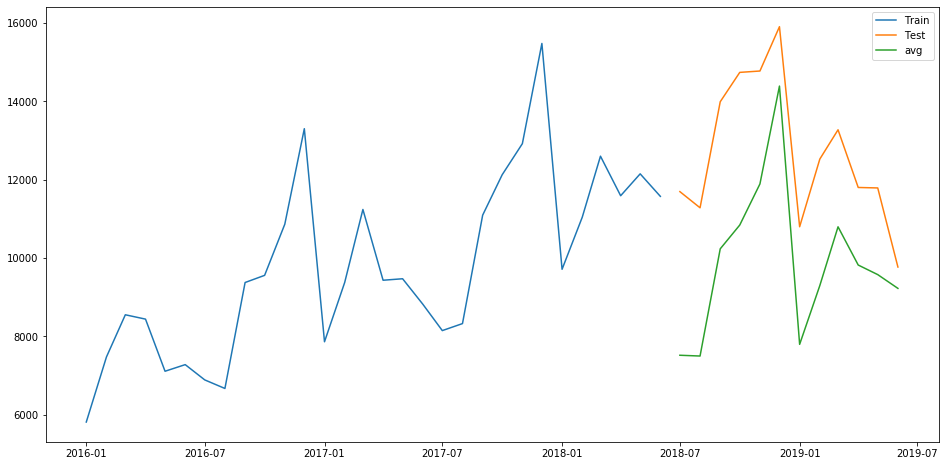

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



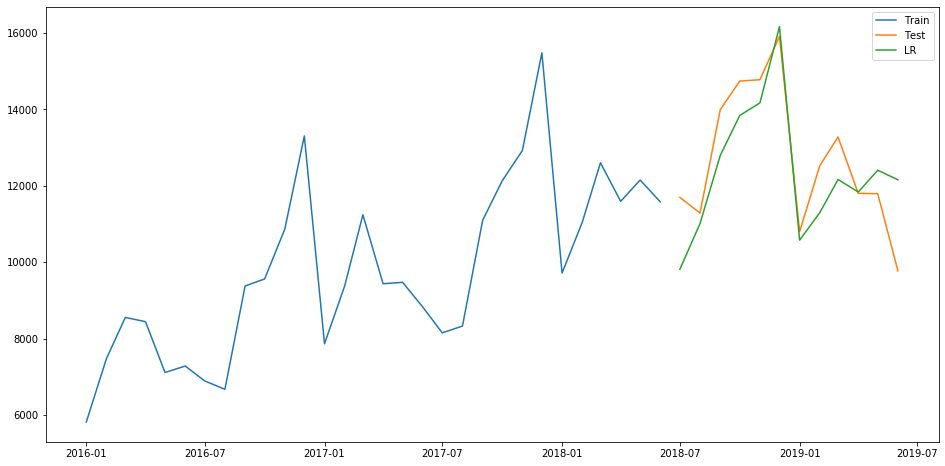

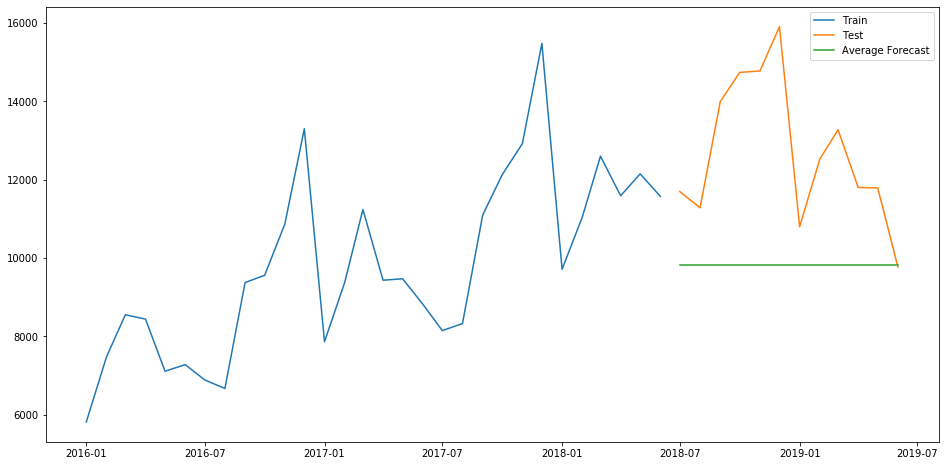

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



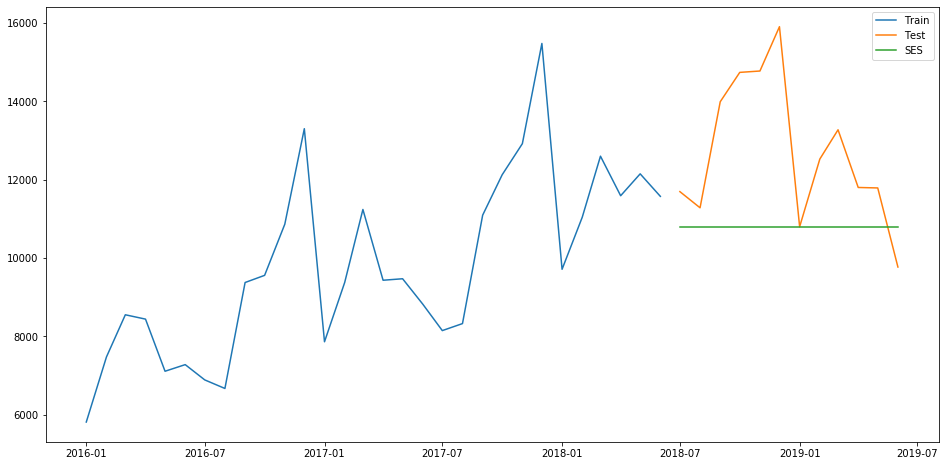

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:734: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:736: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will

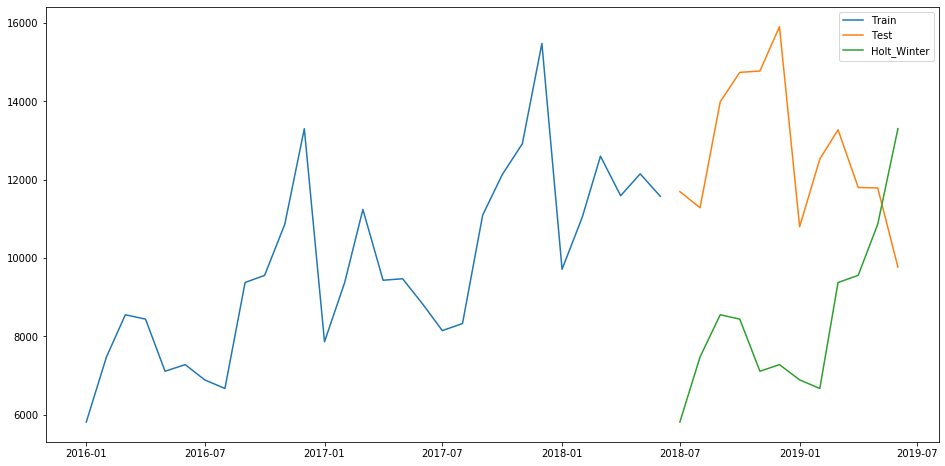

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



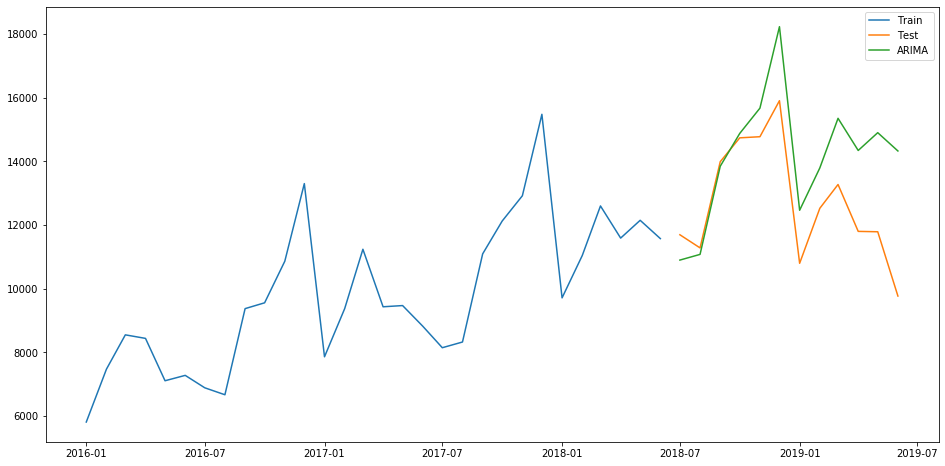

,Model,RMS
0,Average by day in week,2977.984614
1,Linear_Regression,1124.650656
2,Average,3386.787815
3,Simple Exponential Smoothing,2591.188433
4,Holt Winter,5282.700643
5,Auto ARIMA,2092.922239


In [84]:
better_model(DP_IN)

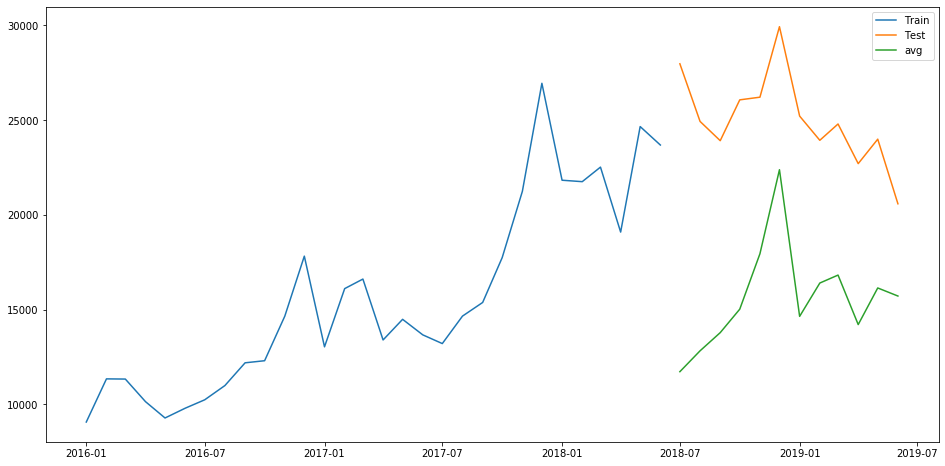

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



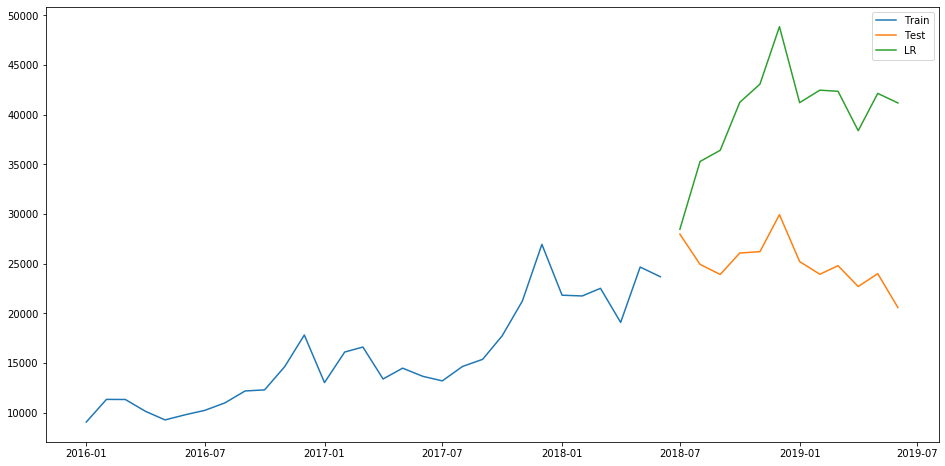

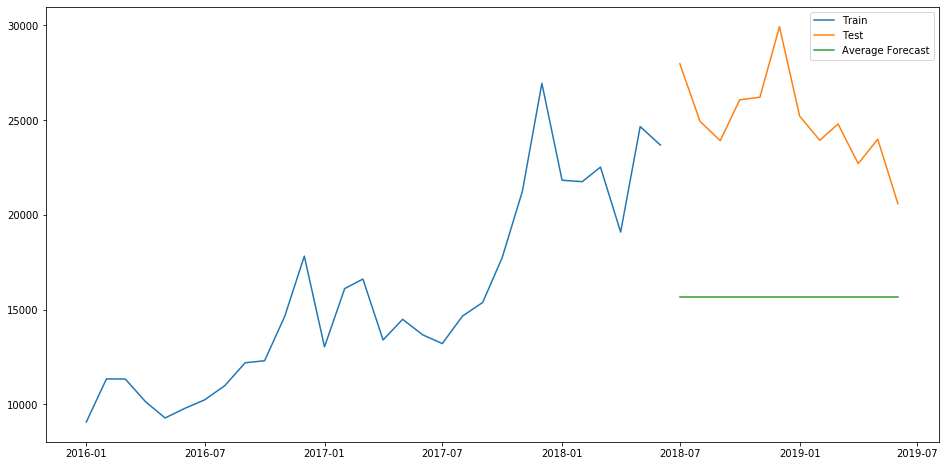

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



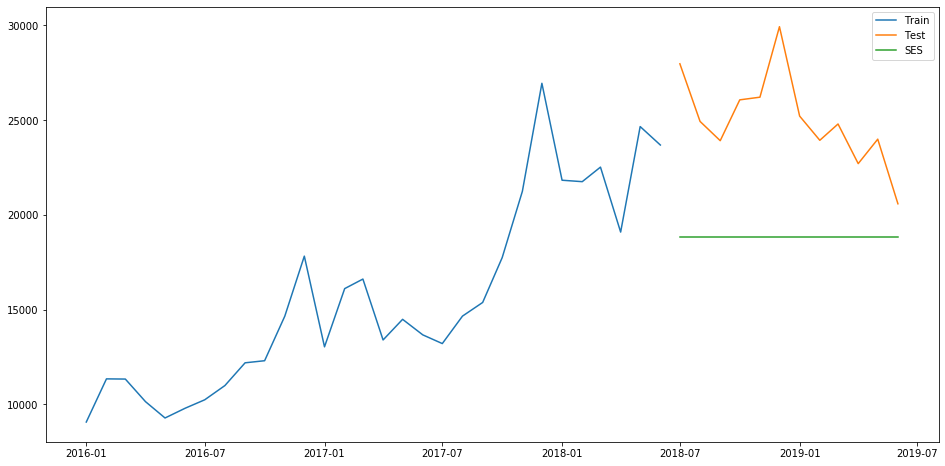

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:734: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:736: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will

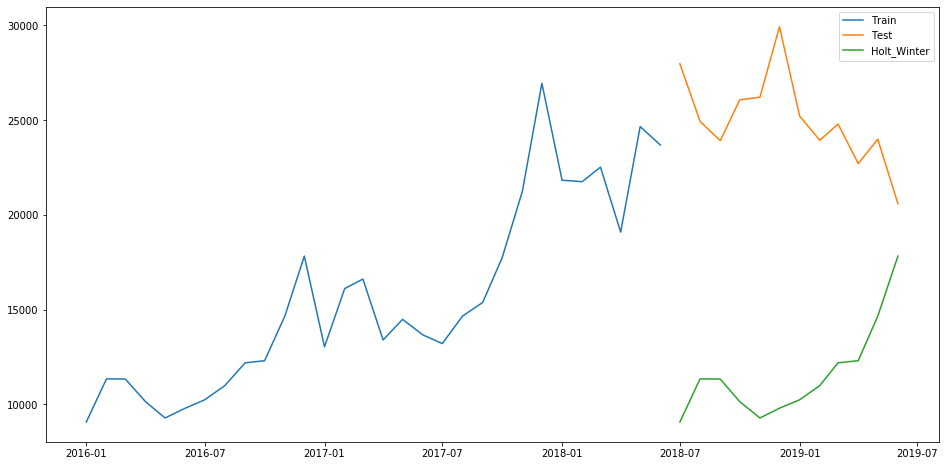

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



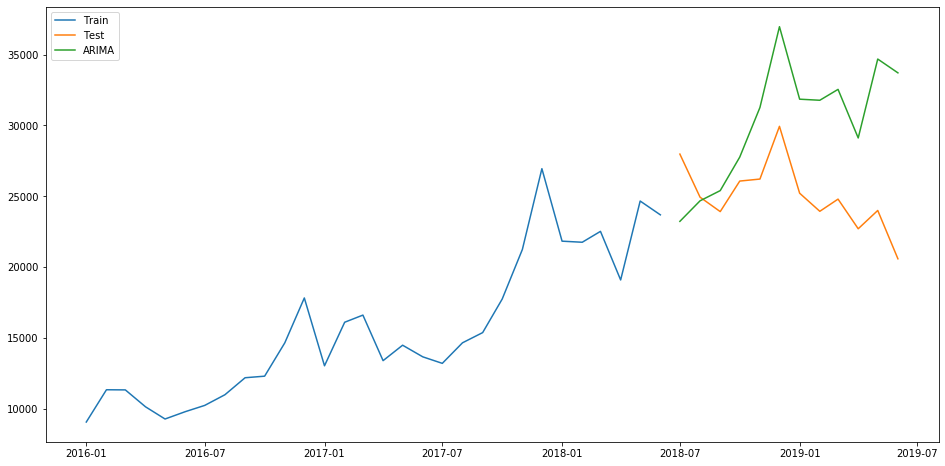

,Model,RMS
0,Average by day in week,9790.893691
1,Linear_Regression,15919.064377
2,Average,9663.062364
3,Simple Exponential Smoothing,6586.298916
4,Holt Winter,14142.859417
5,Auto ARIMA,7043.981438


In [85]:
better_model(DP_OUT)

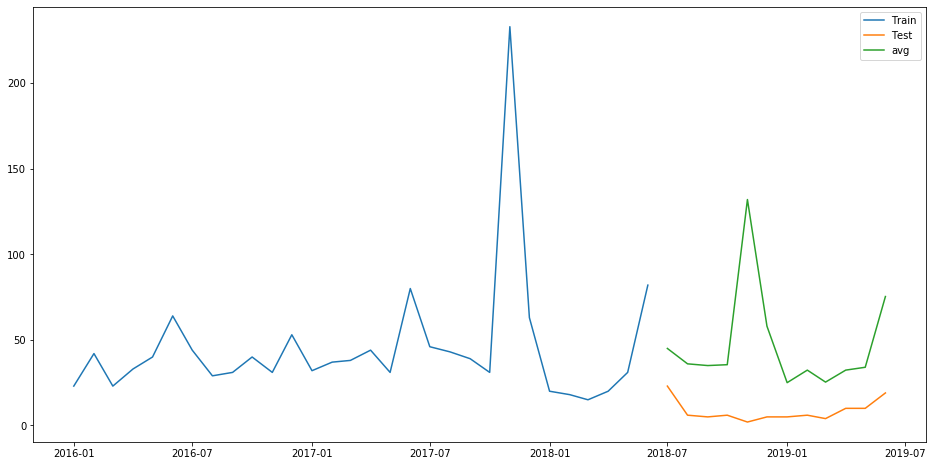

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



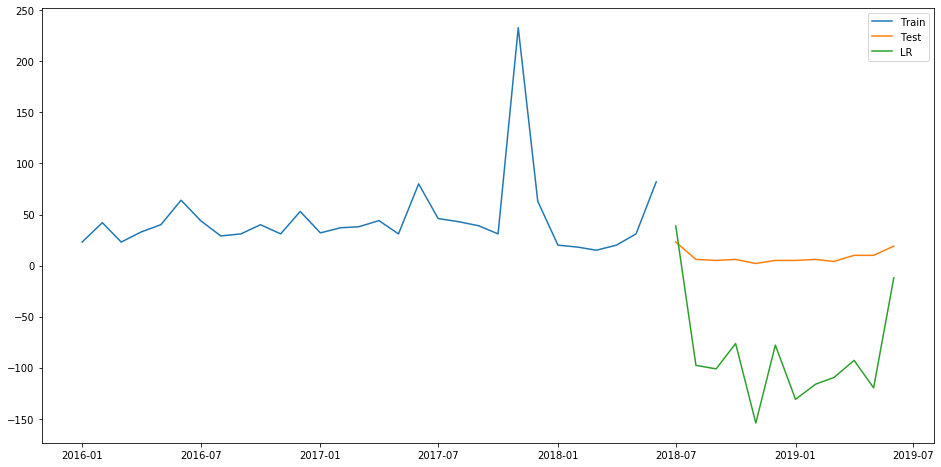

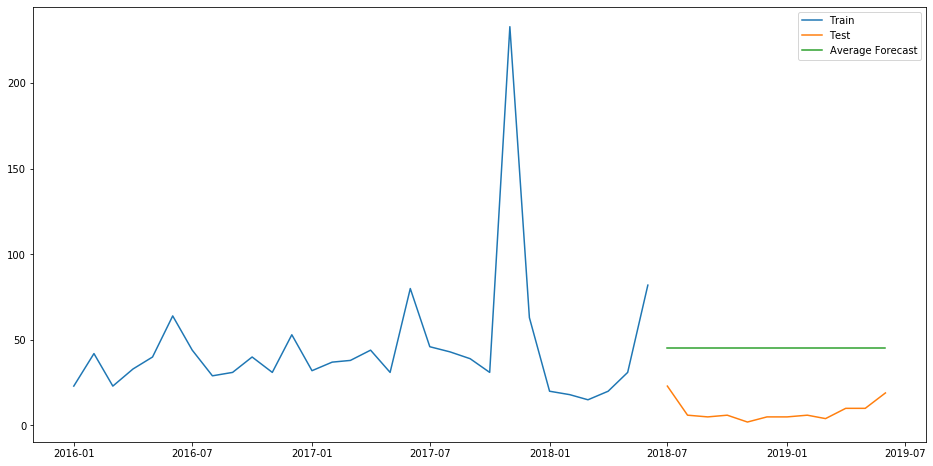

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



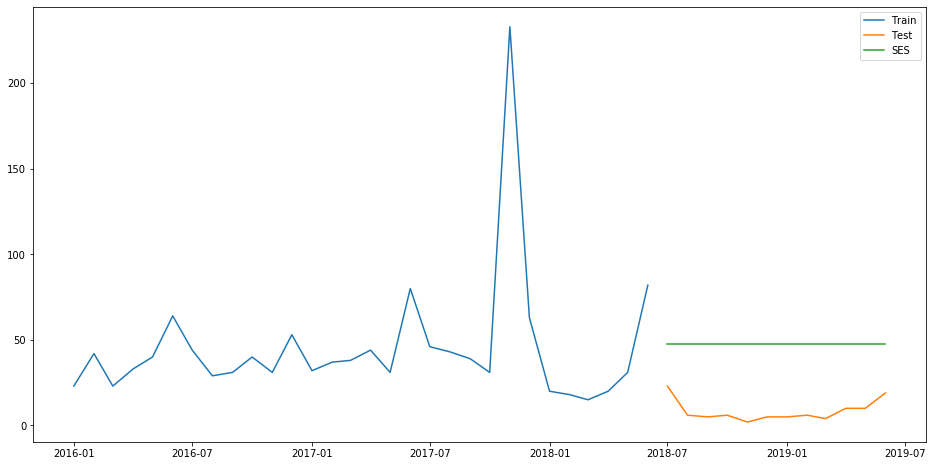

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:734: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:736: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will

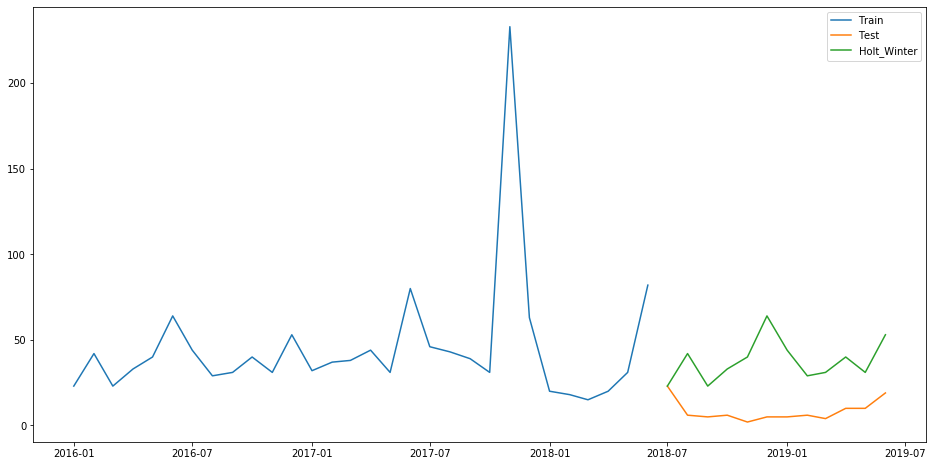

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



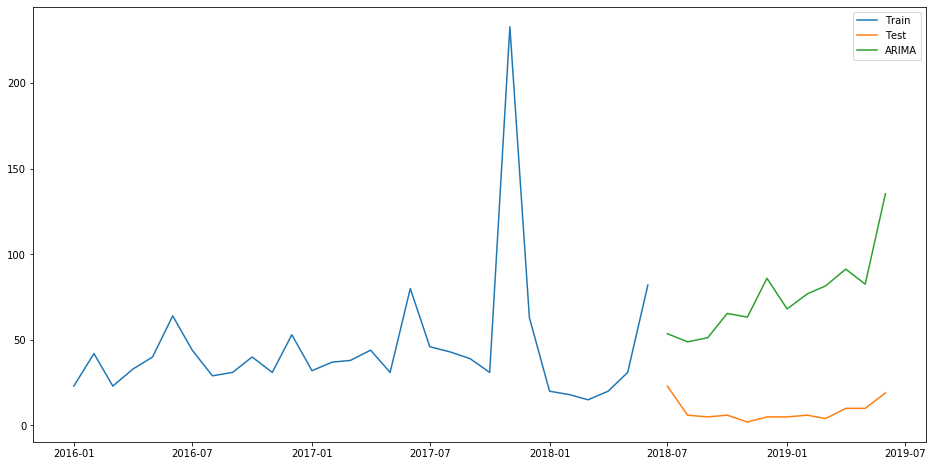

,Model,RMS
0,Average by day in week,48.870601
1,Linear_Regression,106.127539
2,Average,37.281676
3,Simple Exponential Smoothing,39.616781
4,Holt Winter,32.339347
5,Auto ARIMA,70.239097


In [86]:
better_model(CPTW_OUT)

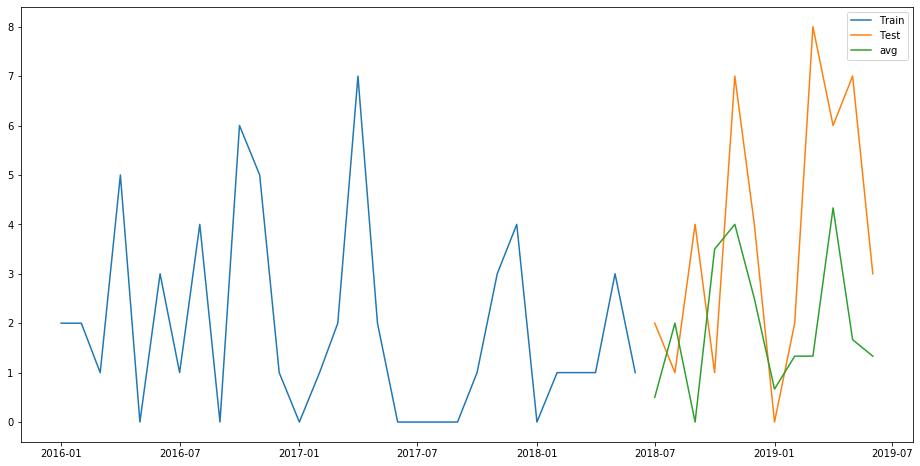

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



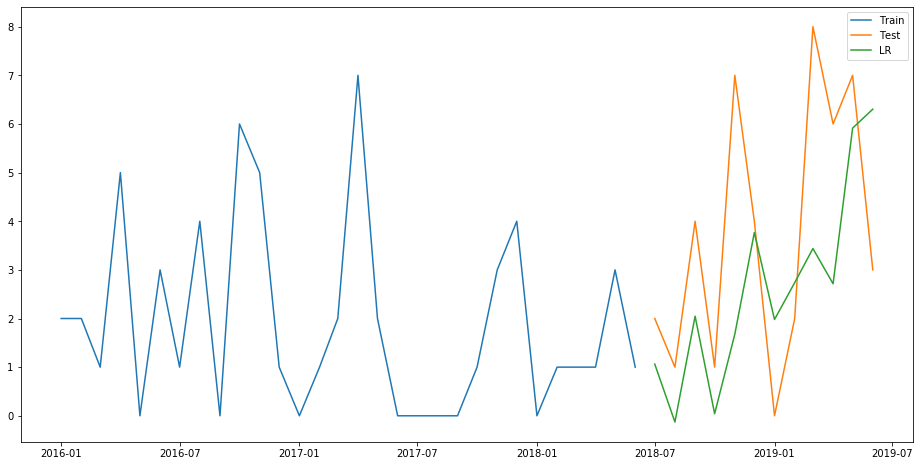

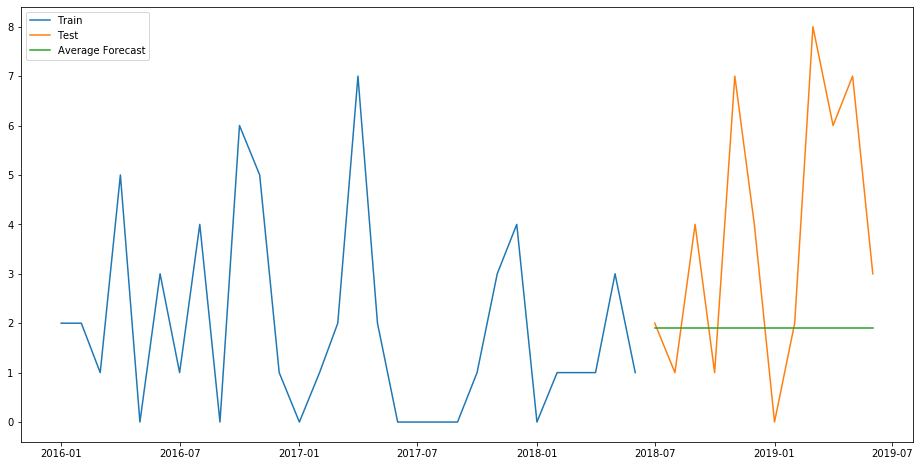

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



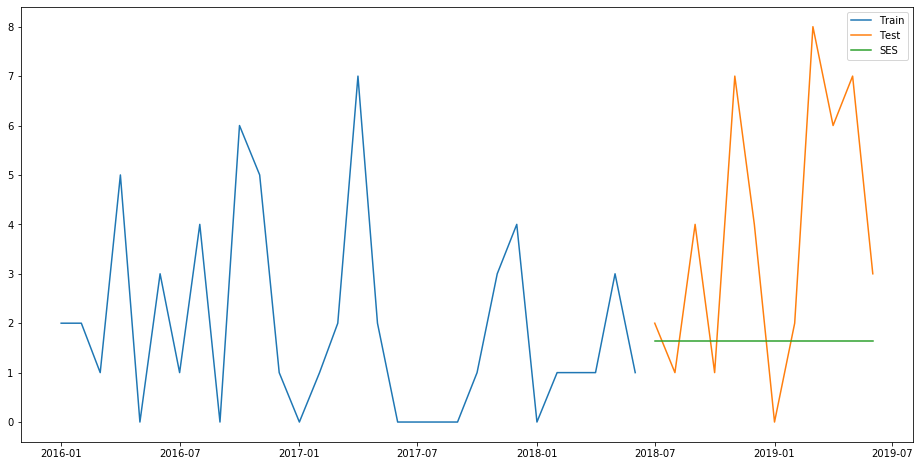

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:734: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:736: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will

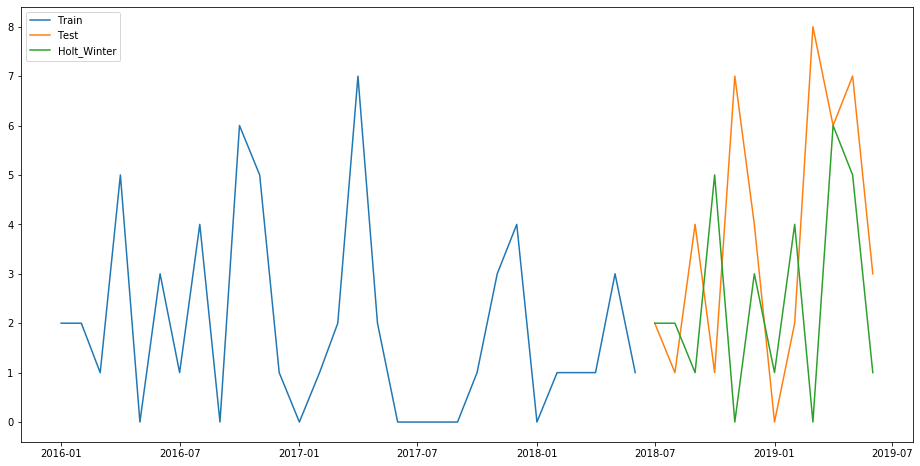

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead



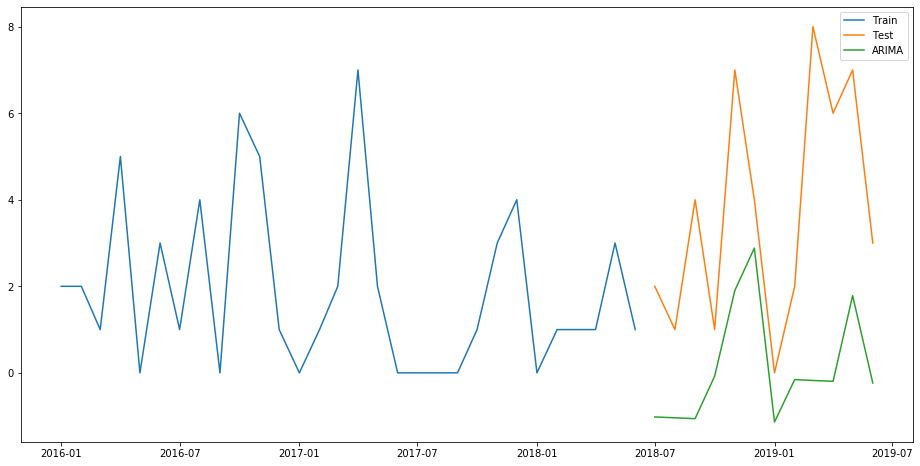

,Model,RMS
0,Average by day in week,3.110243
1,Linear_Regression,2.636888
2,Average,3.179623
3,Simple Exponential Smoothing,3.344076
4,Holt Winter,3.570714
5,Auto ARIMA,4.243264


In [87]:
better_model(CPTW_IN)

In [107]:
from dateutil.relativedelta import relativedelta

In [118]:
date=pd.date_range(start=max(full_dataset['date_obj'])+relativedelta(months=+1), end=max(full_dataset['date_obj'])+relativedelta(months=+12), freq='MS')   

In [120]:
d=pd.DataFrame([[x,y,np.NAN] for x in date for y in b],columns=['date_obj','group','count_parcels'])

In [121]:
pred_dataset=group_distinct.merge(new_df,how='left').fillna(0)
pred_dataset['date_obj']=pd.to_datetime(pred_dataset['date_obj'])
pred_dataset=pred_dataset.append(d).reset_index()

In [122]:
pred_dataset

,index,date_obj,group,count_parcels
0,0,2016-01-01,CPTW_IN,2.0
1,1,2016-01-01,CPTW_OUT,23.0
2,2,2016-01-01,DP_IN,5814.0
3,3,2016-01-01,DP_OUT,9070.0
4,4,2016-02-01,CPTW_IN,2.0
...,...,...,...,...
211,43,2020-05-01,DP_OUT,NaN
212,44,2020-06-01,CPTW_IN,NaN
213,45,2020-06-01,CPTW_OUT,NaN
214,46,2020-06-01,DP_IN,NaN


In [124]:
pred_dataset['year']=pred_dataset['date_obj'].dt.year 
pred_dataset['month']=pred_dataset['date_obj'].dt.month 


In [125]:
CPTW_OUT_pred=pred_dataset[pred_dataset['group']=='CPTW_OUT'].drop(['group','index'],axis=1).set_index('date_obj')

CPTW_IN_pred=pred_dataset[pred_dataset['group']=='CPTW_IN'].drop(['group','index'],axis=1).set_index('date_obj')
DP_IN_pred=pred_dataset[pred_dataset['group']=='DP_IN'].drop(['group','index'],axis=1).set_index('date_obj')
DP_OUT_pred=pred_dataset[pred_dataset['group']=='DP_OUT'].drop(['group','index'],axis=1).set_index('date_obj')

In [126]:



CPTW_OUT_pred['mean']=CPTW_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).mean()
CPTW_OUT_pred['max']=CPTW_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).max()
CPTW_OUT_pred['min']=CPTW_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).min()
CPTW_OUT_pred['median']=CPTW_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).median()
CPTW_OUT_pred['lag_1'] = CPTW_OUT_pred['count_parcels'].shift(12)
CPTW_OUT_pred['lag_2'] = CPTW_OUT_pred['count_parcels'].shift(24)
CPTW_OUT_pred['lag_1']=CPTW_OUT_pred['lag_1'].fillna(CPTW_OUT_pred['median'])
CPTW_OUT_pred['lag_2']=CPTW_OUT_pred['lag_2'].fillna(CPTW_OUT_pred['median'])

DP_IN_pred['mean']=DP_IN_pred['count_parcels'].rolling(window=24,min_periods=1).mean()
DP_IN_pred['max']=DP_IN_pred['count_parcels'].rolling(window=24,min_periods=1).max()
DP_IN_pred['min']=DP_IN_pred['count_parcels'].rolling(window=24,min_periods=1).min()
DP_IN_pred['median']=DP_IN_pred['count_parcels'].rolling(window=24,min_periods=1).median()
DP_IN_pred['lag_1'] = DP_IN_pred['count_parcels'].shift(12)
DP_IN_pred['lag_2'] = DP_IN_pred['count_parcels'].shift(24)
DP_IN_pred['lag_1']=DP_IN_pred['lag_1'].fillna(DP_IN_pred['median'])
DP_IN_pred['lag_2']=DP_IN_pred['lag_2'].fillna(DP_IN_pred['median'])

DP_OUT_pred['mean']=DP_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).mean()
DP_OUT_pred['max']=DP_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).max()
DP_OUT_pred['min']=DP_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).min()
DP_OUT_pred['median']=DP_OUT_pred['count_parcels'].rolling(window=24,min_periods=1).median()
DP_OUT_pred['lag_1'] = DP_OUT_pred['count_parcels'].shift(12)
DP_OUT_pred['lag_2'] = DP_OUT_pred['count_parcels'].shift(24)
DP_OUT_pred['lag_1']=DP_OUT_pred['lag_1'].fillna(DP_OUT_pred['median'])
DP_OUT_pred['lag_2']=DP_OUT_pred['lag_2'].fillna(DP_OUT_pred['median'])

CPTW_IN_pred['mean']=CPTW_IN_pred['count_parcels'].rolling(window=24,min_periods=1).mean()
CPTW_IN_pred['max']=CPTW_IN_pred['count_parcels'].rolling(window=24,min_periods=1).max()
CPTW_IN_pred['min']=CPTW_IN_pred['count_parcels'].rolling(window=24,min_periods=1).min()
CPTW_IN_pred['median']=CPTW_IN_pred['count_parcels'].rolling(window=24,min_periods=1).median()
CPTW_IN_pred['lag_1'] = CPTW_IN_pred['count_parcels'].shift(12)
CPTW_IN_pred['lag_2'] = CPTW_IN_pred['count_parcels'].shift(24)
CPTW_IN_pred['lag_1']=CPTW_IN_pred['lag_1'].fillna(CPTW_IN_pred['median'])
CPTW_IN_pred['lag_2']=CPTW_IN_pred['lag_2'].fillna(CPTW_IN_pred['median'])

In [127]:
len(DP_IN)

42

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



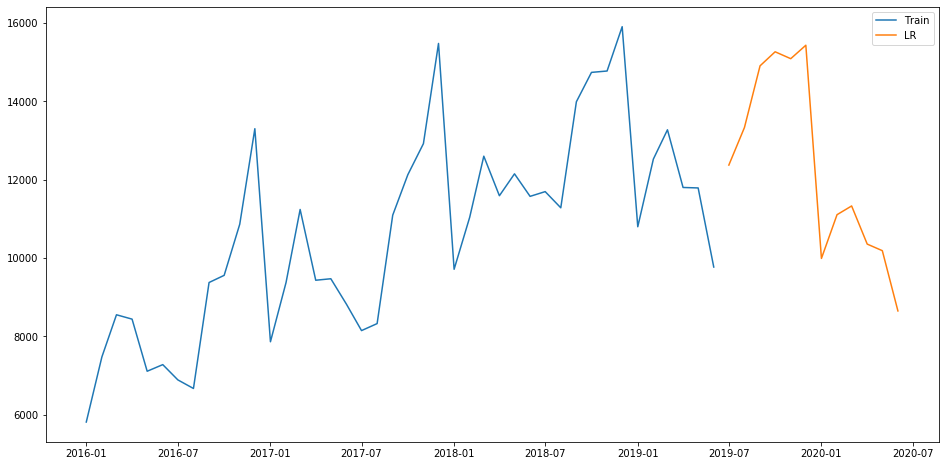

In [132]:
train_1 = DP_IN_pred[:42]
valid_1= DP_IN_pred[42:]
    
x_train = train_1.drop('count_parcels', axis=1)
y_train = train_1['count_parcels']
x_valid = valid_1.drop('count_parcels', axis=1)

    
model = LinearRegression()
model.fit(x_train,y_train)
valid_1['count_parcels']=np.around(model.predict(x_valid))
    
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(valid_1['count_parcels'], label='LR')
plt.legend(loc='best')
plt.show()

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

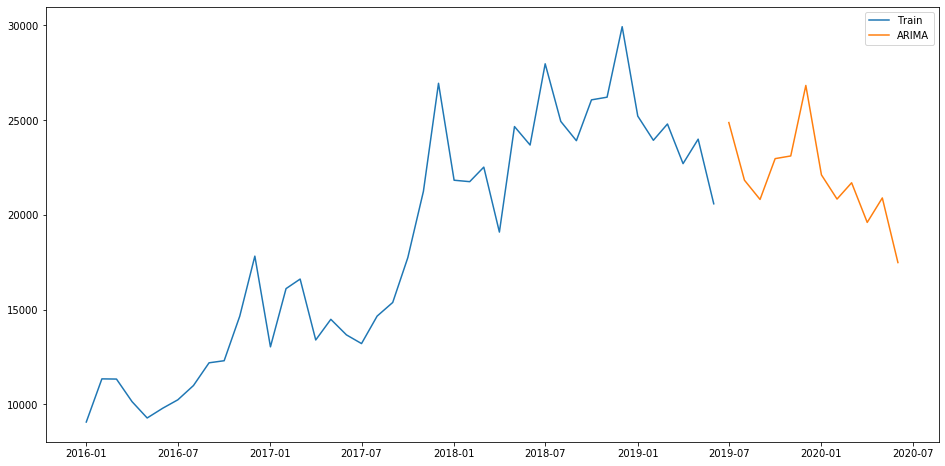

In [138]:
train_2 = DP_OUT_pred[:42]
valid_2= DP_OUT_pred[42:]

training = train_2['count_parcels']
validation = valid_2['count_parcels']

model = auto_arima(training, start_p=0, start_q=0,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=False,error_action='ignore',suppress_warnings=True)
model.fit(training)
    
forecast = model.predict(n_periods=len(valid_2))
forecast = pd.DataFrame(forecast,index = valid_2.index,columns=['Prediction'])
valid_2['count_parcels']=np.around(forecast)
plt.figure(figsize=(16,8))
plt.plot(train_2['count_parcels'], label='Train')
plt.plot(forecast , label='ARIMA')
plt.legend(loc='best')
plt.show()
    

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning:

RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning:

RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

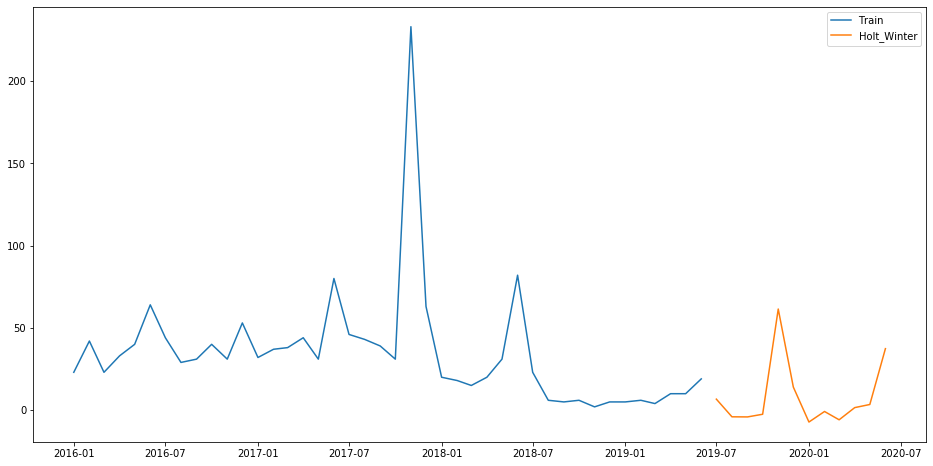

In [143]:
train_3 = CPTW_OUT_pred[:42]
valid_3= CPTW_OUT_pred[42:]

fit1 = ExponentialSmoothing(np.asarray(train_3['count_parcels']) ,seasonal_periods=12 ,  seasonal='add').fit()
valid_3['count_parcels'] = fit1.forecast(len(valid_3))
    
plt.figure(figsize=(16,8))
plt.plot( train_3['count_parcels'], label='Train')
plt.plot(valid_3['count_parcels'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
    

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



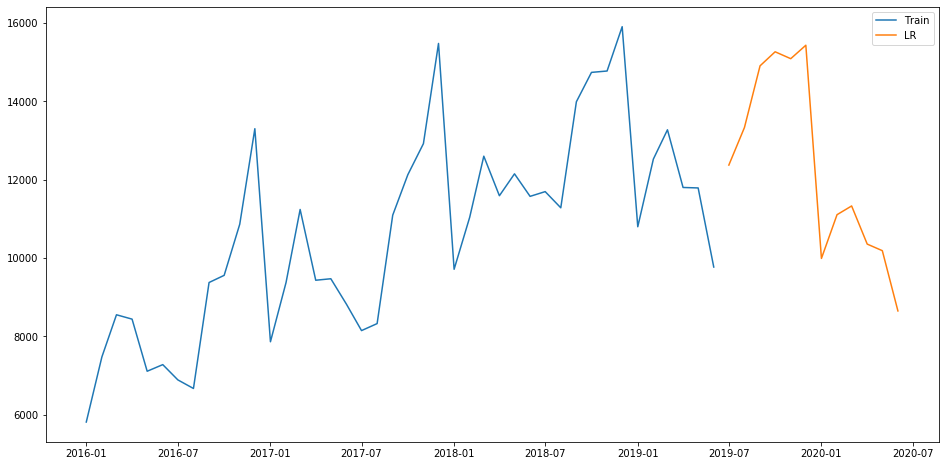

In [144]:
train_4 = CPTW_IN_pred[:42]
valid_4= CPTW_IN_pred[42:]
    
x_train = train_1.drop('count_parcels', axis=1)
y_train = train_1['count_parcels']
x_valid = valid_1.drop('count_parcels', axis=1)

    
model = LinearRegression()
model.fit(x_train,y_train)
valid_4['count_parcels']=np.around(model.predict(x_valid))
    
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(valid_4['count_parcels'], label='LR')
plt.legend(loc='best')
plt.show()

In [145]:
predict1=pd.DataFrame(valid_1['count_parcels'],columns=['count_parcels'])
predict1['cargo type']='DP'
predict1['direction']='IN'
predict2=pd.DataFrame(valid_2['count_parcels'],columns=['count_parcels'])
predict2['cargo type']='DP'
predict2['direction']='OUT'
predict3=pd.DataFrame(valid_3['count_parcels'],columns=['count_parcels'])
predict3['cargo type']='CPTW'
predict3['direction']='OUT'
predict4=pd.DataFrame(valid_4['count_parcels'],columns=['count_parcels'])
predict4['cargo type']='CPTW'
predict4['direction']='IN'

In [146]:
predict=predict1.append([predict2,predict3,predict4])
predict['count_parcels']=predict['count_parcels'].astype('int')
predict.loc[predict['count_parcels']<=0,'count_parcels']=0

In [147]:
predict

,count_parcels,cargo type,direction
date_obj,,,
2019-07-01,12376,DP,IN
2019-08-01,13335,DP,IN
2019-09-01,14910,DP,IN
2019-10-01,15269,DP,IN
2019-11-01,15093,DP,IN
2019-12-01,15436,DP,IN
2020-01-01,9992,DP,IN
2020-02-01,11109,DP,IN
2020-03-01,11332,DP,IN


In [148]:
predict.to_csv('predict_for_year_by_months.csv')